In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter # To adjust the ticks formatting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [92]:
df = pd.read_csv('Covid Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


    **The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

* sex: 1 for female and 2 for male.
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [93]:
df.shape

(1048575, 21)

## B. Data Cleaning and Preprocessing

In [94]:
df.isnull().sum()
#we dont have missing values but 97,98,99 represents missing value in this dataset

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [95]:
df_null = df.copy()
for i in [97, 98, 99]:
   df_null.replace(i , np.nan, inplace = True)

In [96]:
df_null.sample(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
795669,2,12,1,1,9999-99-99,NaN,2.0,32.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,7,NaN
484909,1,12,2,2,9999-99-99,2.0,1.0,46.0,NaN,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0
130395,2,4,1,2,9999-99-99,2.0,2.0,27.0,1.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3,2.0
377491,2,6,1,1,9999-99-99,NaN,2.0,27.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
47150,2,4,1,2,29/06/2020,2.0,1.0,44.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3,2.0


In [97]:
df_null.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

In [98]:
df.drop(columns = ['PREGNANT', 'COPD'], inplace=True)

In [99]:
# sns.heatmap(df_null.isnull())
# plt.title('Before Handling the Missing Values', color = 'black', fontsize = 15)
# plt.show()

In [100]:
# Check for any strings in the feature "DATE_DIED"
df['DATE_DIED'][df['DATE_DIED'].apply(lambda x: isinstance(x, str))]

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570    9999-99-99
1048571    9999-99-99
1048572    9999-99-99
1048573    9999-99-99
1048574    9999-99-99
Name: DATE_DIED, Length: 1048575, dtype: object

In [101]:
df['DEAD'] = [0 if i=='9999-99-99' else 1 for i in df.DATE_DIED]

In [102]:
df['DEAD'].value_counts()

DEAD
0    971633
1     76942
Name: count, dtype: int64

In [103]:
df['DATE_DIED'].replace('9999-99-99', '1/1/1', inplace=True)

In [104]:
df['DATE_DIED'] =  pd.to_datetime(df['DATE_DIED'], format='mixed')

In [105]:
df['DATE_DIED'].isnull().sum()

0

In [106]:
df.describe().round(3).T.drop('count', axis = 1)

,mean,min,25%,50%,75%,max,std
USMER,1.632,1.0,1.0,2.0,2.0,2.0,0.482
MEDICAL_UNIT,8.981,1.0,4.0,12.0,12.0,13.0,3.723
SEX,1.499,1.0,1.0,1.0,2.0,2.0,0.5
PATIENT_TYPE,1.191,1.0,1.0,1.0,1.0,2.0,0.393
DATE_DIED,2002-06-06 10:40:34.414705664,2001-01-01 00:00:00,2001-01-01 00:00:00,2001-01-01 00:00:00,2001-01-01 00:00:00,2021-12-04 00:00:00,NaN
INTUBED,79.523,1.0,97.0,97.0,97.0,99.0,36.869
PNEUMONIA,3.347,1.0,2.0,2.0,2.0,99.0,11.913
AGE,41.794,0.0,30.0,40.0,53.0,121.0,16.907
DIABETES,2.186,1.0,2.0,2.0,2.0,98.0,5.424
ASTHMA,2.243,1.0,2.0,2.0,2.0,98.0,5.114


We can notice that we have major missing values at the following features:
1- "ICU"
2- "INTUBED"
3- "PREGNANT"

In [107]:
df['AGE'].isnull().sum()

0

In [108]:
value_counts_AGE = df['AGE'].value_counts()

# Get the count of the specific value (e.g., 9999)
count_of_missing_values_of_AGE = value_counts_AGE.get([97, 98, 99], 0)

In [109]:
count_of_missing_values_of_AGE

AGE
97    135
98    124
99     86
Name: count, dtype: int64

In [132]:
df['OBESITY'].fillna(df['OBESITY'].mean(), inplace=True)

In [133]:
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['AGE'].replace ([97, 98, 99], df['AGE'].mean(), inplace = True)

In [134]:
value_counts_AGE = df['AGE'].value_counts()

# Get the count of the specific value (e.g., 9999)
count_of_missing_values_of_AGE = value_counts_AGE.get([97, 98, 99], 0)

In [135]:
count_of_missing_values_of_AGE

0

In [136]:
df.shape

(1048575, 20)

In [137]:
df.ICU.value_counts()

ICU
2    1024229
1      24346
Name: count, dtype: int64

In [138]:
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and at ICU = {i} the shape will be:", "\n")
        print (df[(df['PATIENT_TYPE'] == j) & (df['ICU'] == i)].shape, "\n",
               "--------------------------------------------------------------------------------", "\n\n")

At PATIENT_TYPE = 1 and at ICU = 1 the shape will be: 

(0, 20) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 1 the shape will be: 

(24346, 20) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 2 the shape will be: 

(848544, 20) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 2 the shape will be: 

(175685, 20) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 97 the shape will be: 

(0, 20) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 97 the shape will be: 

(0, 20) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 99 the shape will be: 

(0, 20) 
 -----------------

From the above we can see that the missing values of (97) are all corresponding to the values of PATIENT_TYPE = 1 which is for non hospitalized patients, while those of (99) are the missing values of the hospitalized patients, which again can not be telled or predicted.


So we can replace all the values of (97) with (2); since obviously patients who have never been hospitalized couldn't possibly be admitted to the ICU.

In [139]:
df['ICU'].replace (97, 2, inplace = True)

In [140]:
df.ICU.value_counts()

ICU
2    1024229
1      24346
Name: count, dtype: int64

In [141]:
df['ICU'].replace(99, 1, inplace=True)

In [142]:
df.ICU.value_counts()

ICU
2    1024229
1      24346
Name: count, dtype: int64

In [143]:
df.INTUBED.value_counts()

INTUBED
2    1007594
1      40981
Name: count, dtype: int64

In [144]:
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and at INTUBED = {i} the shape will be:", "\n")
        print (df[(df['PATIENT_TYPE'] == j) & (df['INTUBED'] == i)].shape, "\n",
               "--------------------------------------------------------------------------------", "\n\n")

At PATIENT_TYPE = 1 and at INTUBED = 1 the shape will be: 

(0, 20) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at INTUBED = 1 the shape will be: 

(40981, 20) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at INTUBED = 2 the shape will be: 

(848544, 20) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at INTUBED = 2 the shape will be: 

(159050, 20) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at INTUBED = 97 the shape will be: 

(0, 20) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at INTUBED = 97 the shape will be: 

(0, 20) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at INTUBED = 99 the shape will be: 


In [145]:
df['INTUBED'].replace (97, 2, inplace = True)

In [146]:
df.INTUBED.value_counts()

INTUBED
2    1007594
1      40981
Name: count, dtype: int64

In [147]:
df['INTUBED'].replace (99, 1, inplace = True)

In [148]:
df_null = df.copy()
for i in [97, 98, 99]:
    df_null.replace(i , np.nan, inplace = True)
df_null.isnull().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
DATE_DIED                   0
INTUBED                     0
PNEUMONIA               16003
AGE                         0
DIABETES                 3338
ASTHMA                   2979
INMSUPR                  3404
HIPERTENSION             3104
OTHER_DISEASE            5045
CARDIOVASCULAR           3076
OBESITY                  3032
RENAL_CHRONIC            3006
TOBACCO                  3220
CLASIFFICATION_FINAL        0
ICU                         0
DEAD                        0
dtype: int64

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   USMER                 1048575 non-null  int64         
 1   MEDICAL_UNIT          1048575 non-null  int64         
 2   SEX                   1048575 non-null  int64         
 3   PATIENT_TYPE          1048575 non-null  int64         
 4   DATE_DIED             1048575 non-null  datetime64[ns]
 5   INTUBED               1048575 non-null  int64         
 6   PNEUMONIA             1048575 non-null  int64         
 7   AGE                   1048575 non-null  float64       
 8   DIABETES              1048575 non-null  int64         
 9   ASTHMA                1048575 non-null  int64         
 10  INMSUPR               1048575 non-null  int64         
 11  HIPERTENSION          1048575 non-null  int64         
 12  OTHER_DISEASE         1048575 non-null  in

In [150]:
col = df_null.columns

print(col)

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'DIABETES', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD'],
      dtype='object')


In [151]:
df_null.dropna(subset=['PNEUMONIA', 'DIABETES', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
                       'OTHER_DISEASE', 'CARDIOVASCULAR', 'RENAL_CHRONIC', 'TOBACCO',
                       ], inplace=True)

In [152]:
df_null['OBESITY'].value_counts()

OBESITY
2.0    868308
1.0    156995
Name: count, dtype: int64

In [154]:
df_null['OBESITY'].fillna(df_null['OBESITY'].mean(), inplace=True)

In [155]:
df_null.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
DIABETES                0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
DEAD                    0
dtype: int64

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   USMER                 1048575 non-null  int64         
 1   MEDICAL_UNIT          1048575 non-null  int64         
 2   SEX                   1048575 non-null  int64         
 3   PATIENT_TYPE          1048575 non-null  int64         
 4   DATE_DIED             1048575 non-null  datetime64[ns]
 5   INTUBED               1048575 non-null  int64         
 6   PNEUMONIA             1048575 non-null  int64         
 7   AGE                   1048575 non-null  float64       
 8   DIABETES              1048575 non-null  int64         
 9   ASTHMA                1048575 non-null  int64         
 10  INMSUPR               1048575 non-null  int64         
 11  HIPERTENSION          1048575 non-null  int64         
 12  OTHER_DISEASE         1048575 non-null  in

In [158]:
new_df = df_null.sample(n=100000, random_state=1)

# Display the sampled DataFrame
new_df


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,DIABETES,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
480259,2,12,1,1,2001-01-01,2,2.0,51.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2,0
299331,2,4,1,1,2001-01-01,2,2.0,54.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,7,2,0
64956,2,4,1,1,2001-01-01,2,2.0,38.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3,2,0
314972,1,4,1,2,2001-01-01,2,1.0,67.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,7,2,0
60774,1,4,2,2,2001-01-01,2,2.0,31.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432643,2,10,1,2,2001-01-01,2,2.0,48.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1,2,0
891213,2,12,1,1,2001-01-01,2,2.0,59.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2,0
956421,2,12,1,1,2001-01-01,2,2.0,38.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2,0
864356,2,12,2,1,2001-01-01,2,2.0,44.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2,0


In [159]:
new_df.drop(['DATE_DIED'],axis=1, inplace=True)

In [160]:
new_df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'DIABETES', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
       'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',
       'CLASIFFICATION_FINAL', 'ICU', 'DEAD'],
      dtype='object')

In [161]:
new_df.sample(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
489325,2,12,1,1,2,2.0,36.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2,0
289984,1,4,1,1,2,2.0,26.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2,0
25290,1,4,1,2,2,1.0,52.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,7,2,1
831851,2,12,2,1,2,2.0,38.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,7,2,0
448758,2,12,1,2,1,1.0,74.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,1,1
846007,2,12,2,1,2,2.0,59.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2,0
577033,2,12,2,1,2,2.0,40.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2,0
445790,1,12,1,2,2,1.0,54.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3,1,1
460652,1,12,2,2,1,1.0,45.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,7,1,1
1033076,2,12,1,1,2,2.0,53.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,7,2,0


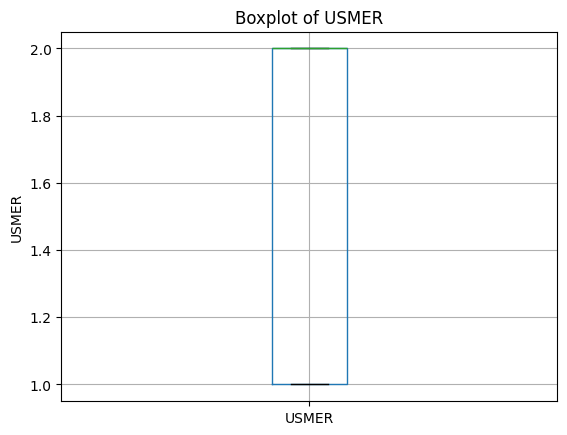

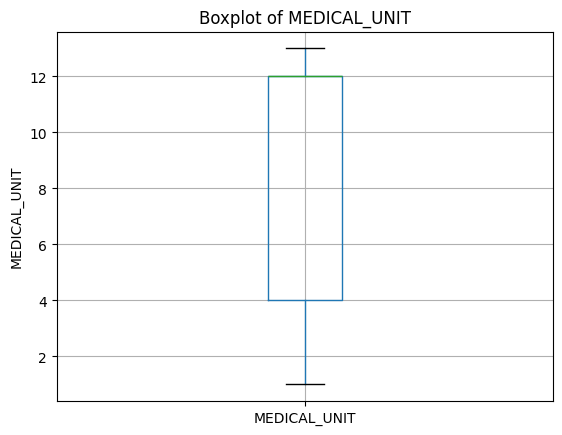

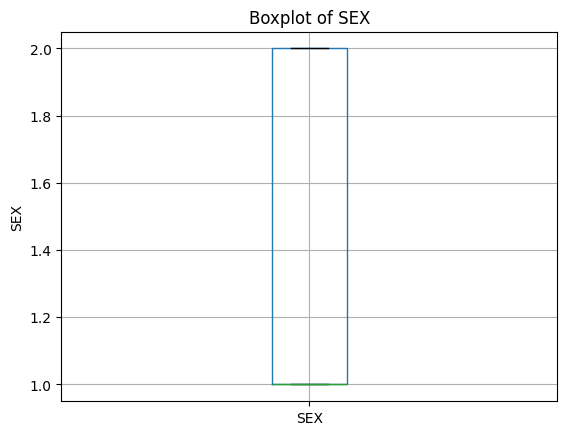

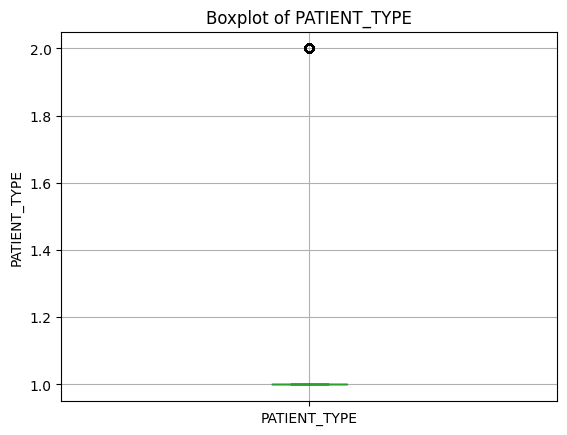

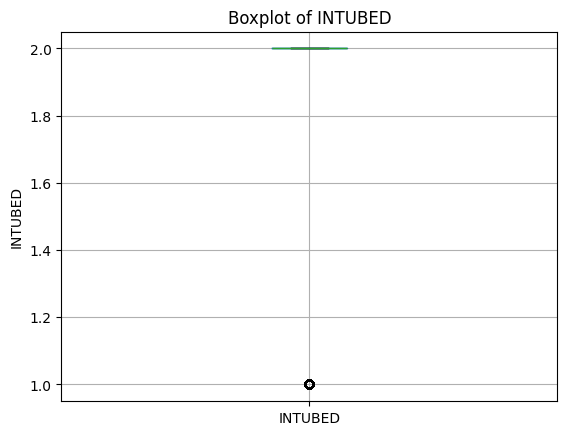

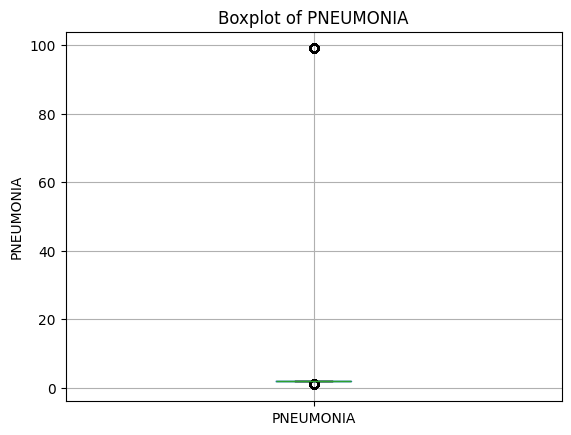

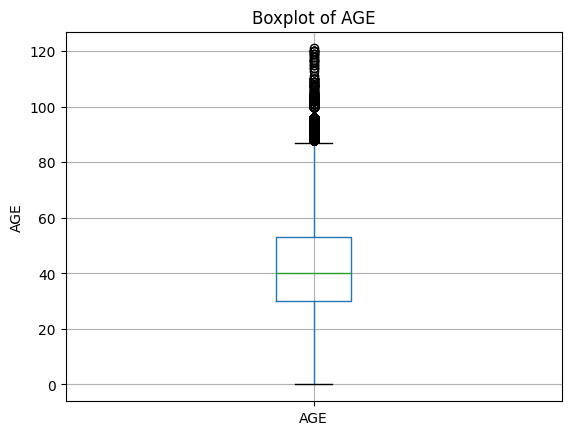

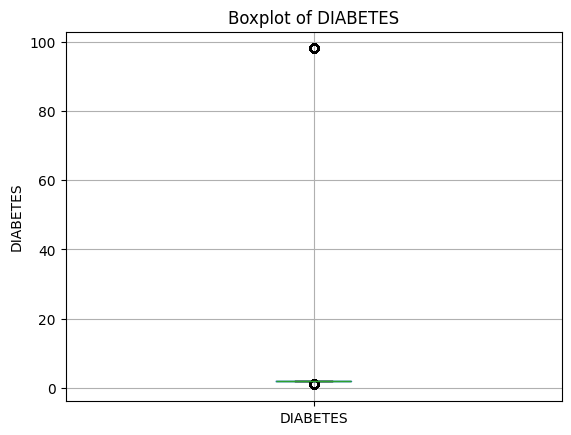

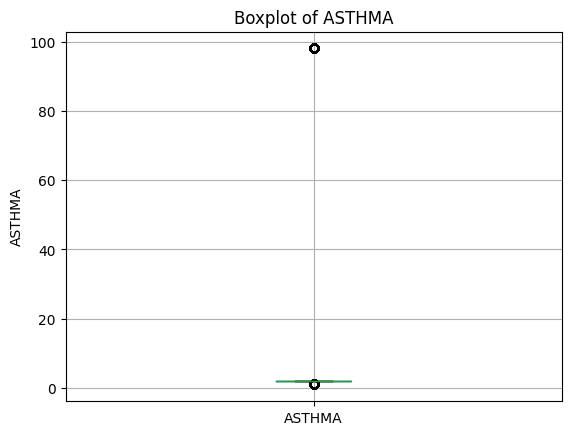

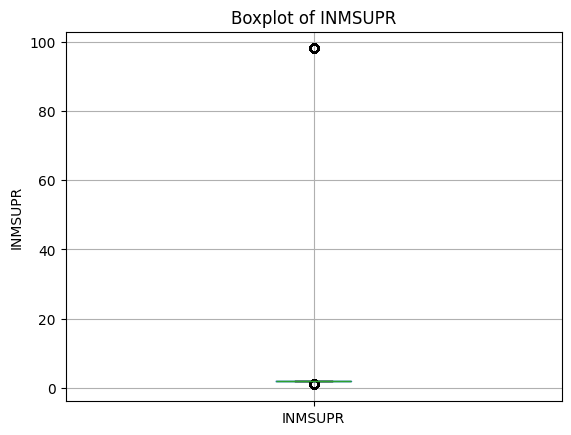

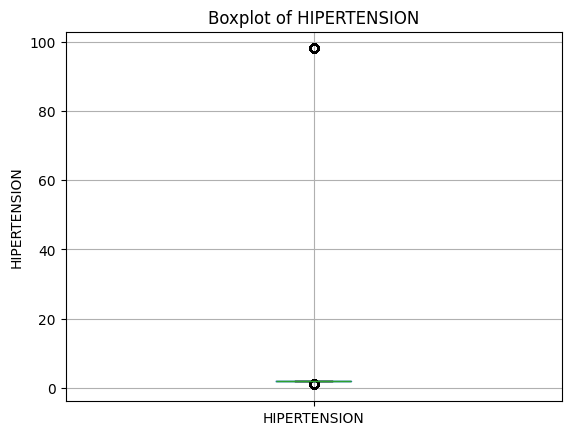

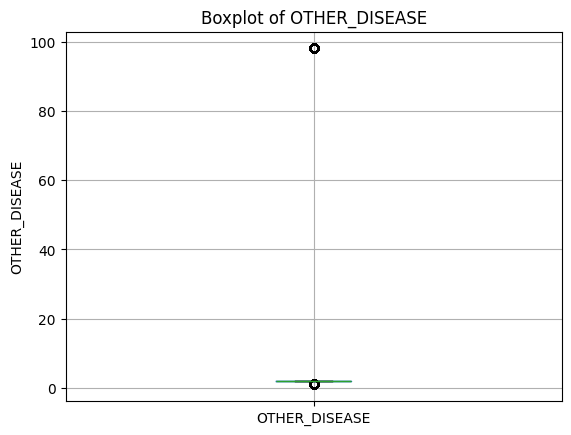

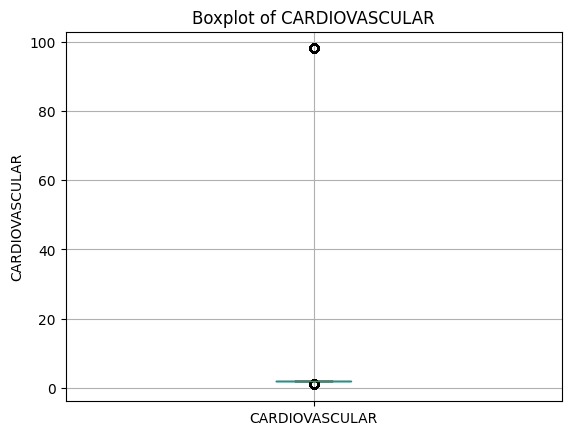

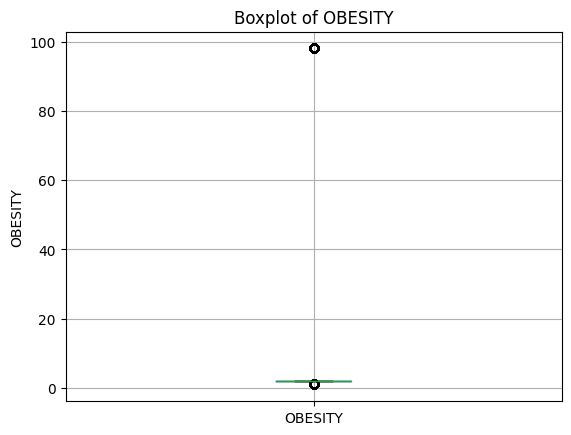

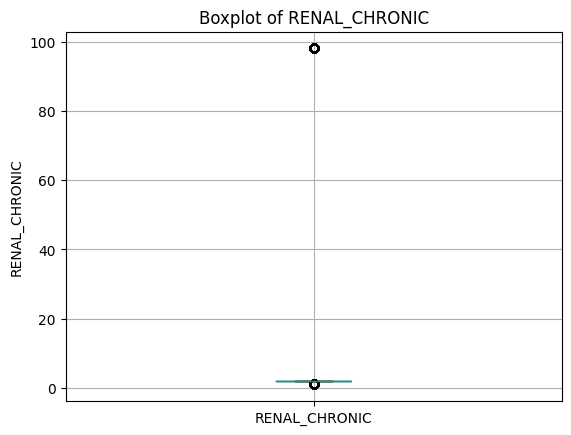

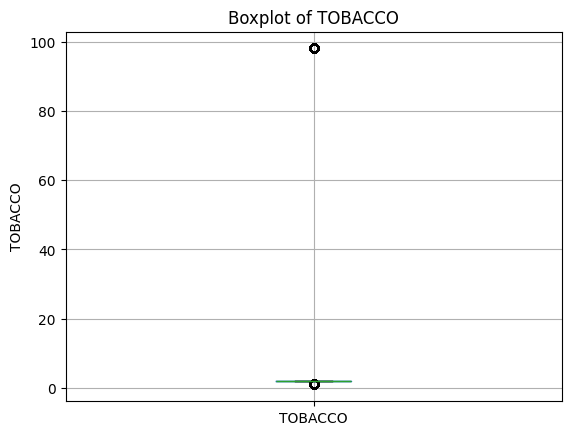

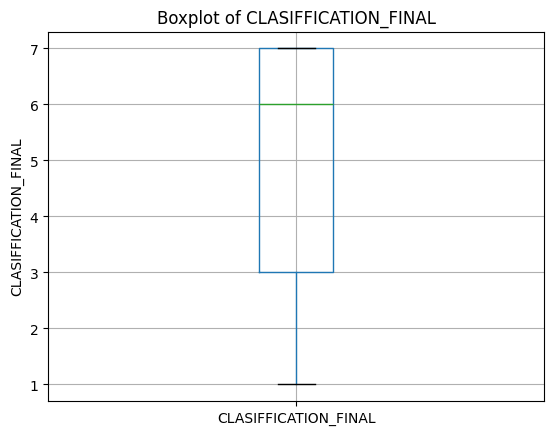

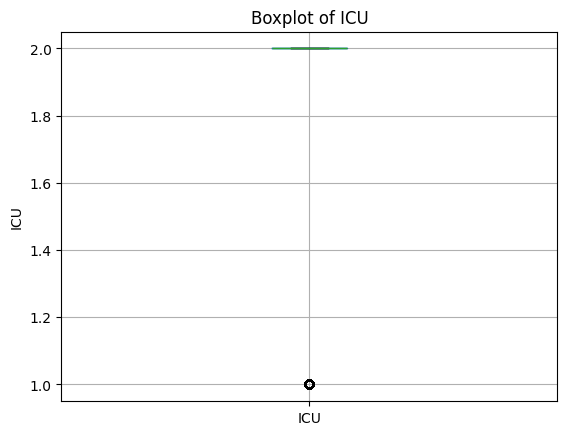

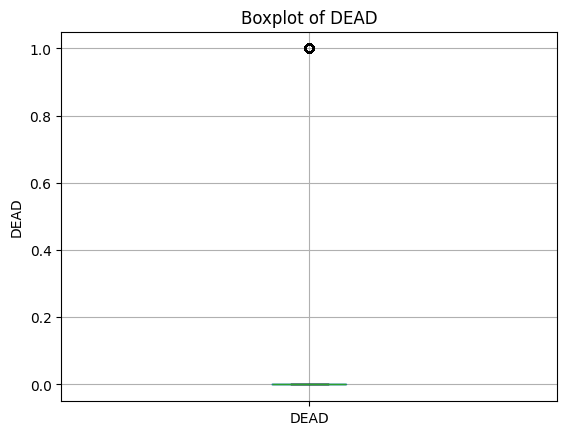

In [162]:
for column in new_df.columns:
    plt.figure()
    df.boxplot(column=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

In [163]:
new_df['DEAD'].unique()

array([0, 1], dtype=int64)

In [164]:
new_df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
480259,2,12,1,1,2,2.0,51.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2,0
299331,2,4,1,1,2,2.0,54.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,7,2,0
64956,2,4,1,1,2,2.0,38.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3,2,0
314972,1,4,1,2,2,1.0,67.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,7,2,0
60774,1,4,2,2,2,2.0,31.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2,0


Number of people died

In [165]:
new_df['DEAD'].value_counts()[1]

7326

C:\Users\PMLS\AppData\Local\Temp\ipykernel_19832\3227126059.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=D, palette = ['#990000',"#0a75ad"])


Text(0, 0.5, 'Count')

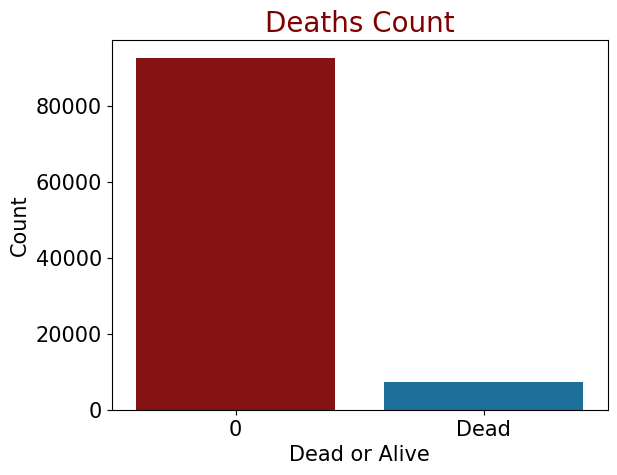

In [166]:
D = new_df['DEAD']
D = D.replace(1, "Dead")
D = D.replace(2, "Alive")
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Deaths Count', color = '#800000', fontsize = 20)
sns.countplot(x=D, palette = ['#990000',"#0a75ad"])
plt.xlabel("Dead or Alive", fontsize=15)
plt.ylabel("Count", fontsize=15)

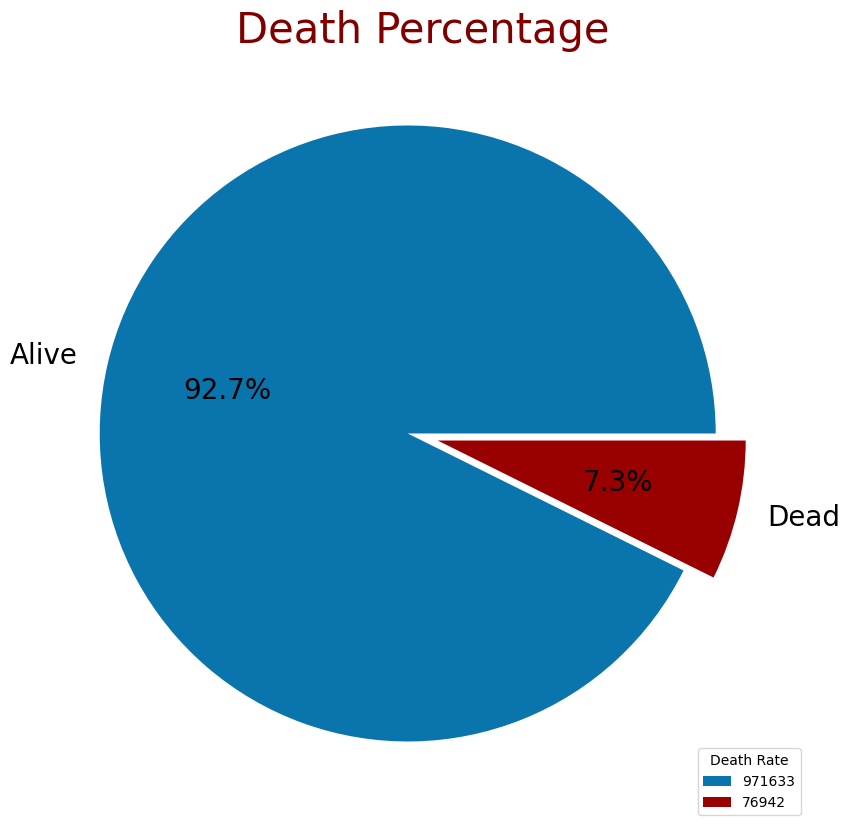

In [167]:
labels = ["Alive", "Dead"]
sizes = df['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Death Percentage',color = '#800000',fontsize = 30)
plt.legend(df['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

In [168]:
df_dead = new_df[new_df["DEAD"] == 1]
df_dead

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
459116,1,12,2,2,2,2.0,58.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2,1
55975,1,4,2,2,2,1.0,47.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,7,2,1
446768,1,12,2,2,2,1.0,52.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2,1,1
457160,2,12,2,2,2,1.0,49.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2,2,1
57956,2,4,1,2,1,2.0,76.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466046,1,12,1,2,2,1.0,70.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2,1
457398,1,12,2,2,2,1.0,68.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2,1
48506,1,4,2,2,2,2.0,87.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2,1
23715,1,4,2,2,2,2.0,55.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2,1


In [169]:
df_dead["CLASIFFICATION_FINAL"].value_counts()

CLASIFFICATION_FINAL
3    5067
7    1215
6     652
2     180
5     106
1      94
4      12
Name: count, dtype: int64

We can see that we have dead patients with all "Classification" values starting from 1 till we go to 7, meaning we have dead people who were not diagnosed with Covid 19, and hence we can say that the dead patients didn't have the same results with a majority of whom were being diagnosed with Covid 19.

What is the percentage of Covid carriers among those dead patients?

In [170]:
def Covid_or_Not(val):
    if val >= 4:
        return "Not a Covid 19 Carrier"
    else:
        return "A Covid 19 Carrier"

In [171]:
df_dead['Covid_or_Not'] = df_dead["CLASIFFICATION_FINAL"].apply(Covid_or_Not)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_19832\2835730378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dead['Covid_or_Not'] = df_dead["CLASIFFICATION_FINAL"].apply(Covid_or_Not)


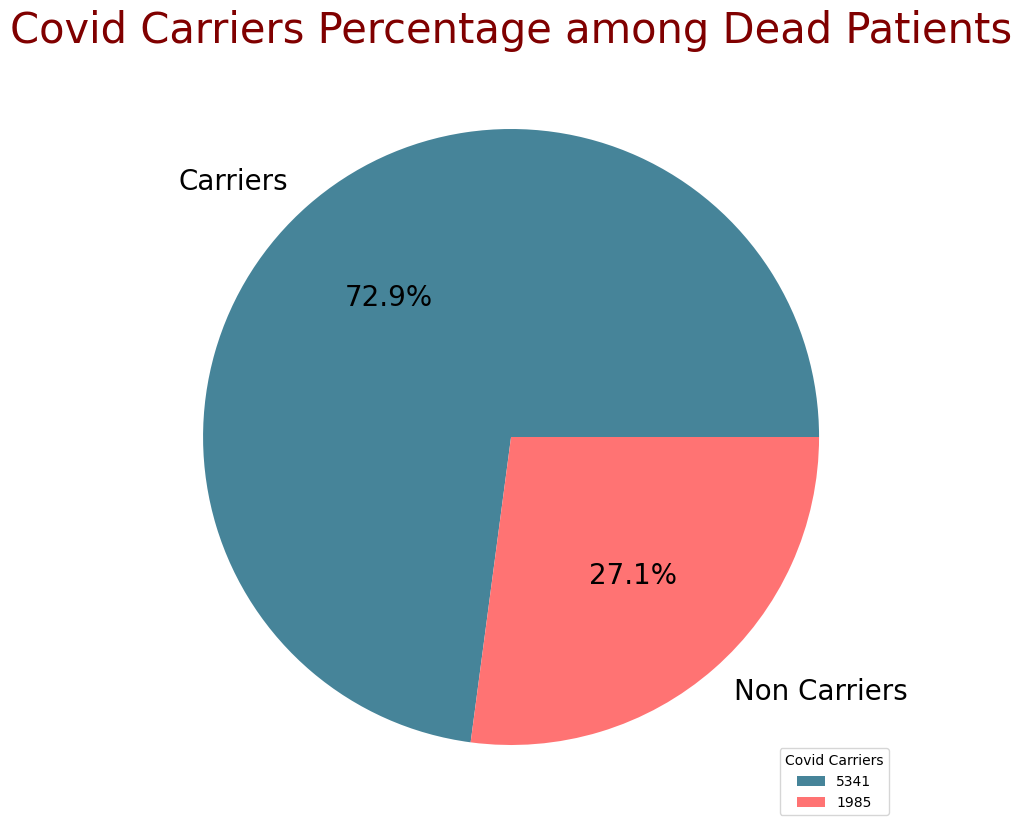

In [172]:
labels = ["Carriers", "Non Carriers"]
sizes = df_dead['Covid_or_Not'].value_counts()
colors = ['#468499', '#ff7373']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Covid Carriers Percentage among Dead Patients', color = 'Maroon', fontsize = 30)
plt.legend(df_dead['Covid_or_Not'].value_counts(), loc = 'lower right', title = 'Covid Carriers')
plt.show()

In [173]:
df_dead["Covid_or_Not"].value_counts()

Covid_or_Not
A Covid 19 Carrier        5341
Not a Covid 19 Carrier    1985
Name: count, dtype: int64

What about the percentage of Covid carriers among all the patients?

In [174]:
new_df['Covid_or_Not'] = new_df["CLASIFFICATION_FINAL"].apply(Covid_or_Not)

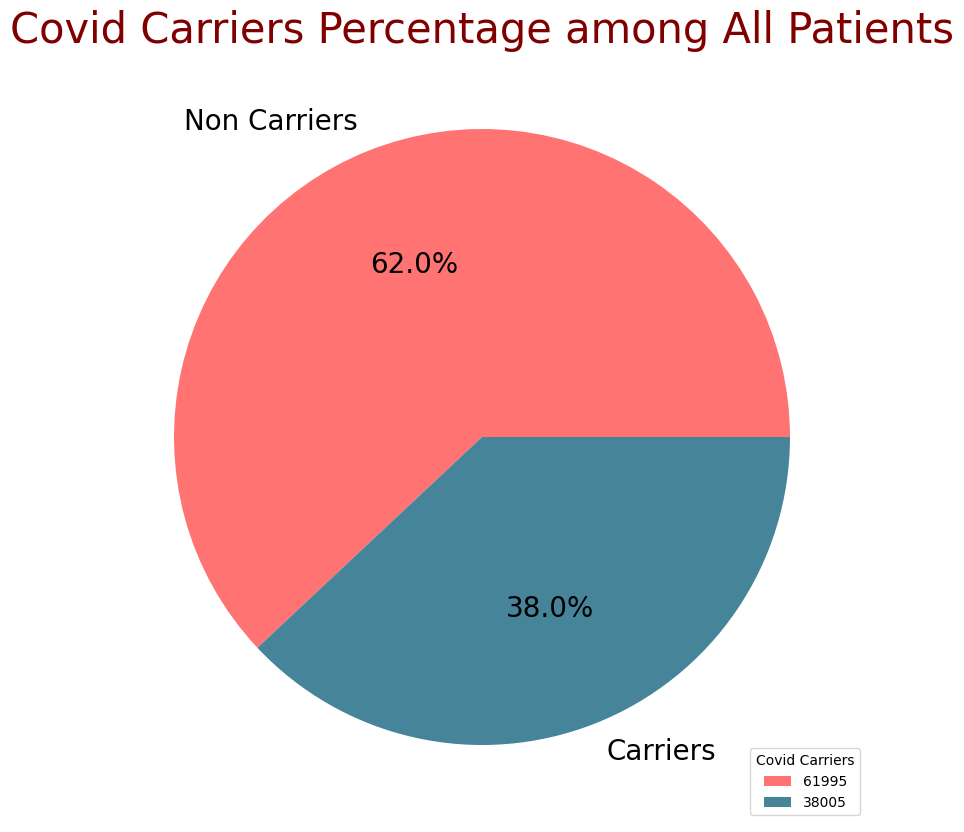

In [175]:
labels = ["Non Carriers", "Carriers"]
sizes = new_df['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Covid Carriers Percentage among All Patients', color = 'Maroon', fontsize = 30)
plt.legend(new_df['Covid_or_Not'].value_counts(), loc = 'lower right', title = 'Covid Carriers')
plt.show()

What is the percentage of death among those carriers?

In [176]:
Covid_deaths = new_df[(new_df['Covid_or_Not'] == "A Covid 19 Carrier")]

In [177]:
Covid_deaths["DEAD"].value_counts()

DEAD
0    32664
1     5341
Name: count, dtype: int64

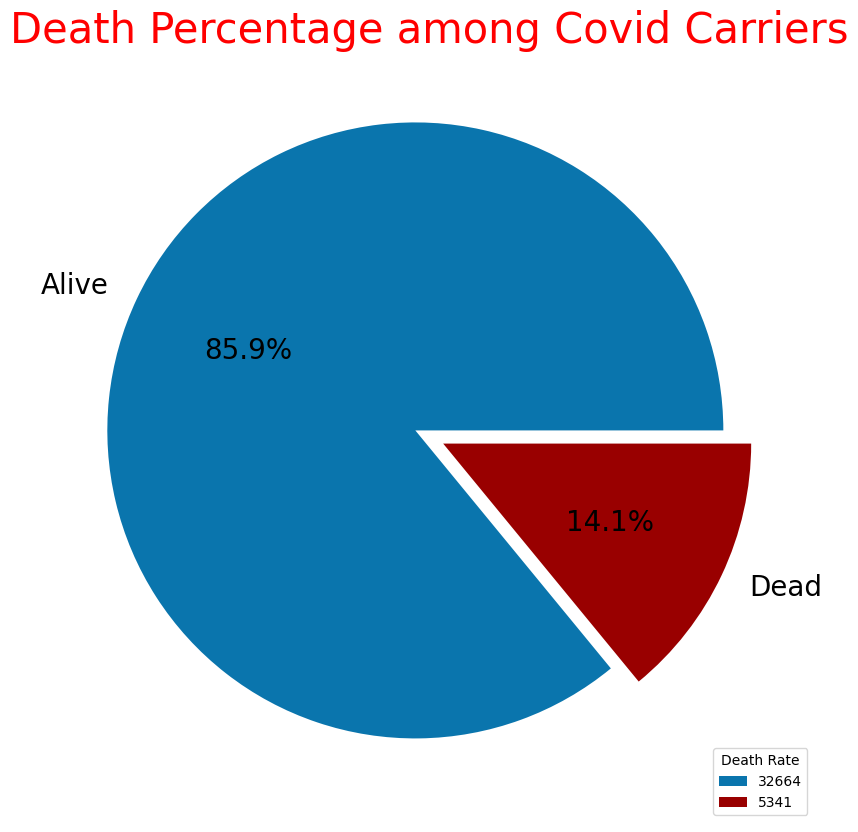

In [178]:
labels = ["Alive", "Dead"]
sizes = Covid_deaths['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Death Percentage among Covid Carriers',color = 'red',fontsize = 30)
plt.legend(Covid_deaths['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

 Is it true that age has some impact?

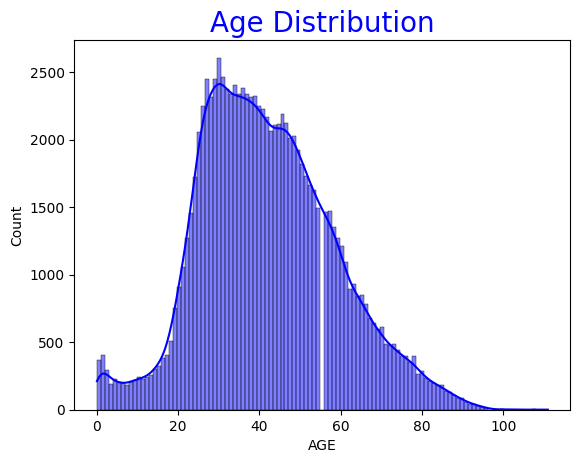

In [179]:
sns.histplot(x=new_df.AGE, kde = True, color = "blue")
plt.title('Age Distribution', color = 'blue', fontsize = 20)
plt.show()

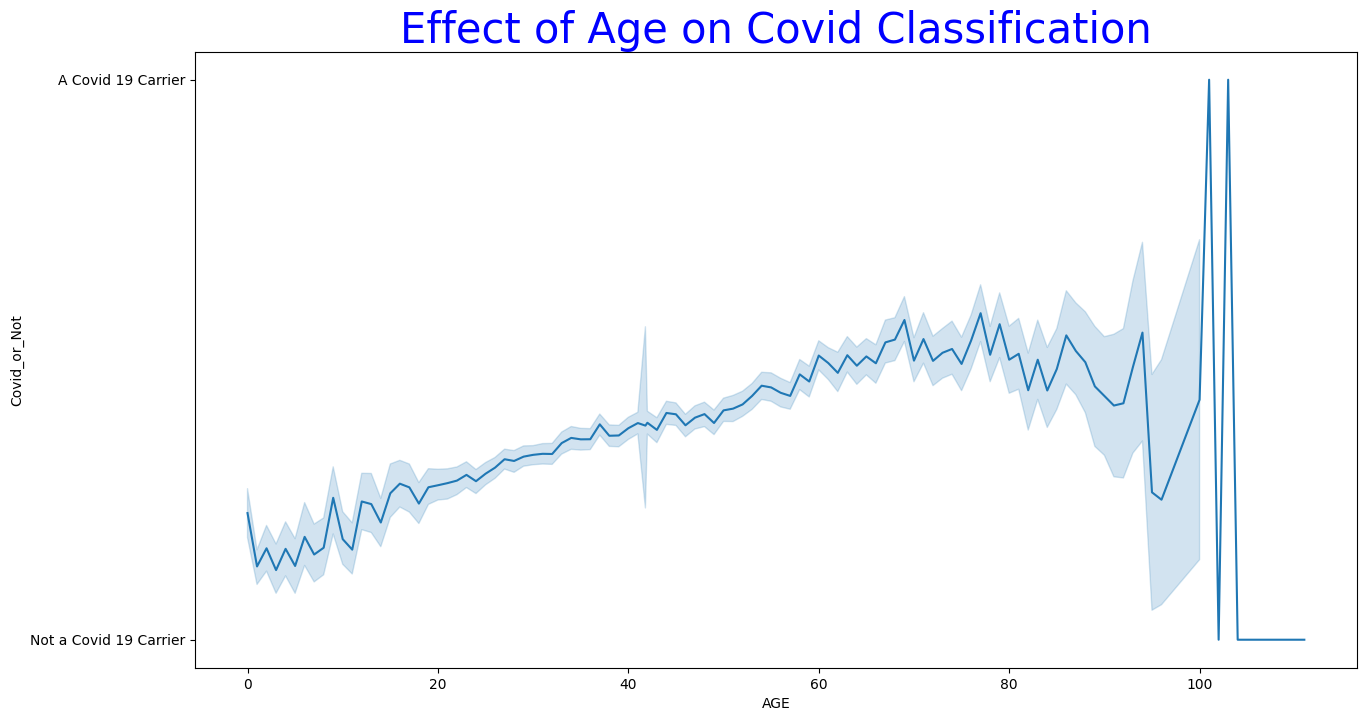

In [180]:
plt.figure(figsize=(15,8))
sns.lineplot(data=new_df, x="AGE", y="Covid_or_Not")
plt.title('Effect of Age on Covid Classification', color = 'blue', fontsize = 30)
plt.show()

Does obesity has an impact?

In [181]:
df_mod = new_df.copy()

In [182]:
df_mod.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_or_Not
480259,2,12,1,1,2,2.0,51.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2,0,A Covid 19 Carrier
299331,2,4,1,1,2,2.0,54.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,7,2,0,Not a Covid 19 Carrier
64956,2,4,1,1,2,2.0,38.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3,2,0,A Covid 19 Carrier
314972,1,4,1,2,2,1.0,67.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,7,2,0,Not a Covid 19 Carrier
60774,1,4,2,2,2,2.0,31.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2,0,A Covid 19 Carrier


In [183]:
df_mod['OBESITY'] = ["Obese" if i==1 else "Not Obese" for i in new_df.OBESITY]

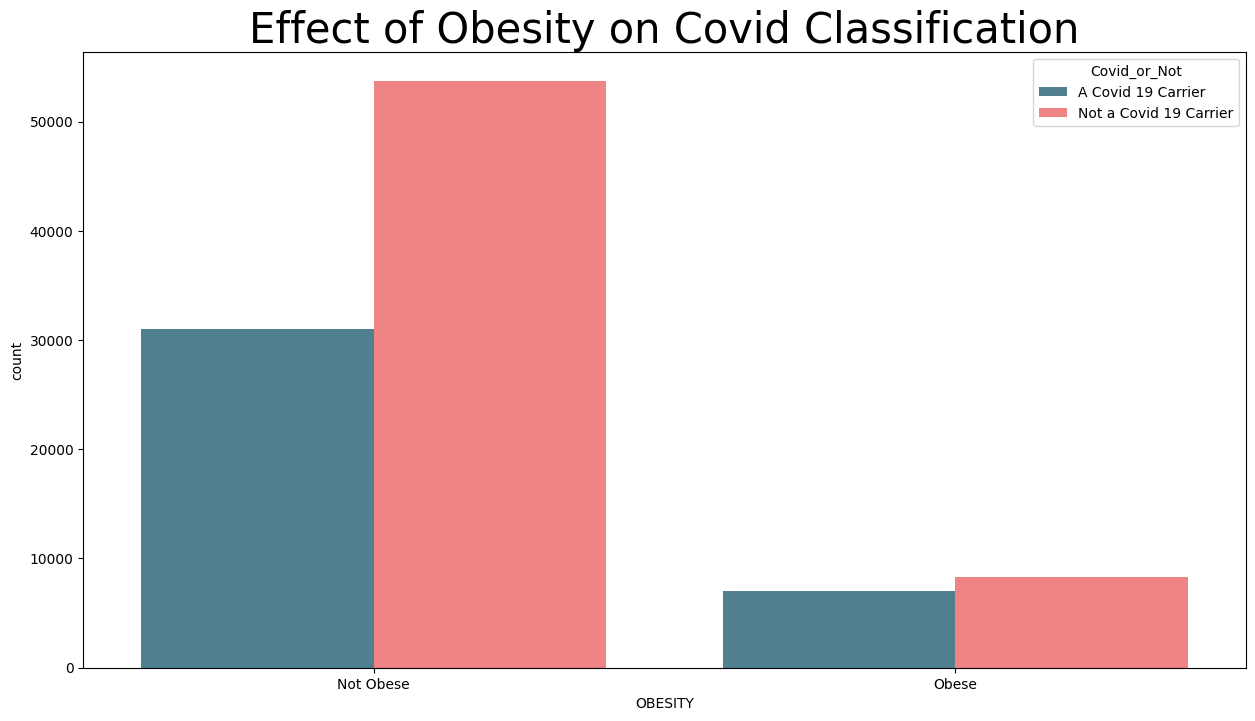

In [184]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_mod, x="OBESITY", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Obesity on Covid Classification', color = 'black', fontsize = 30)
plt.show()

Does gender has any impact?

In [185]:
df_mod['SEX'] = ["Female" if i==1 else "Male" for i in new_df.SEX]

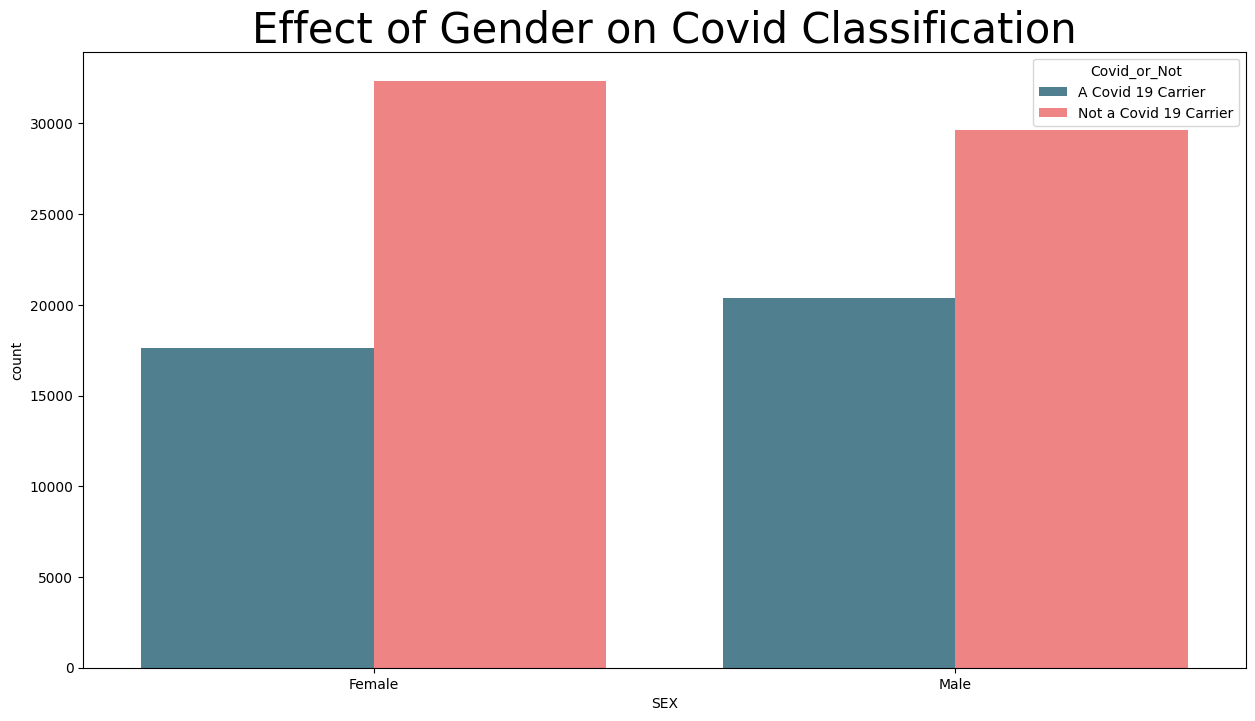

In [186]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_mod, x="SEX", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Gender on Covid Classification', color = 'black', fontsize = 30)
plt.show()

Do other diseases affect the patient classification?

In [188]:
df_med = new_df.drop(columns=['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE',
                          'INTUBED', 'AGE', 'CLASIFFICATION_FINAL', 'ICU'], axis=1)
df_med.head()

,PNEUMONIA,DIABETES,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DEAD,Covid_or_Not
480259,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,A Covid 19 Carrier
299331,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,0,Not a Covid 19 Carrier
64956,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0,A Covid 19 Carrier
314972,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,0,Not a Covid 19 Carrier
60774,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,A Covid 19 Carrier


In [189]:
df_diseases = df_med.drop(columns = [ "OBESITY", 'DEAD', 'Covid_or_Not'])

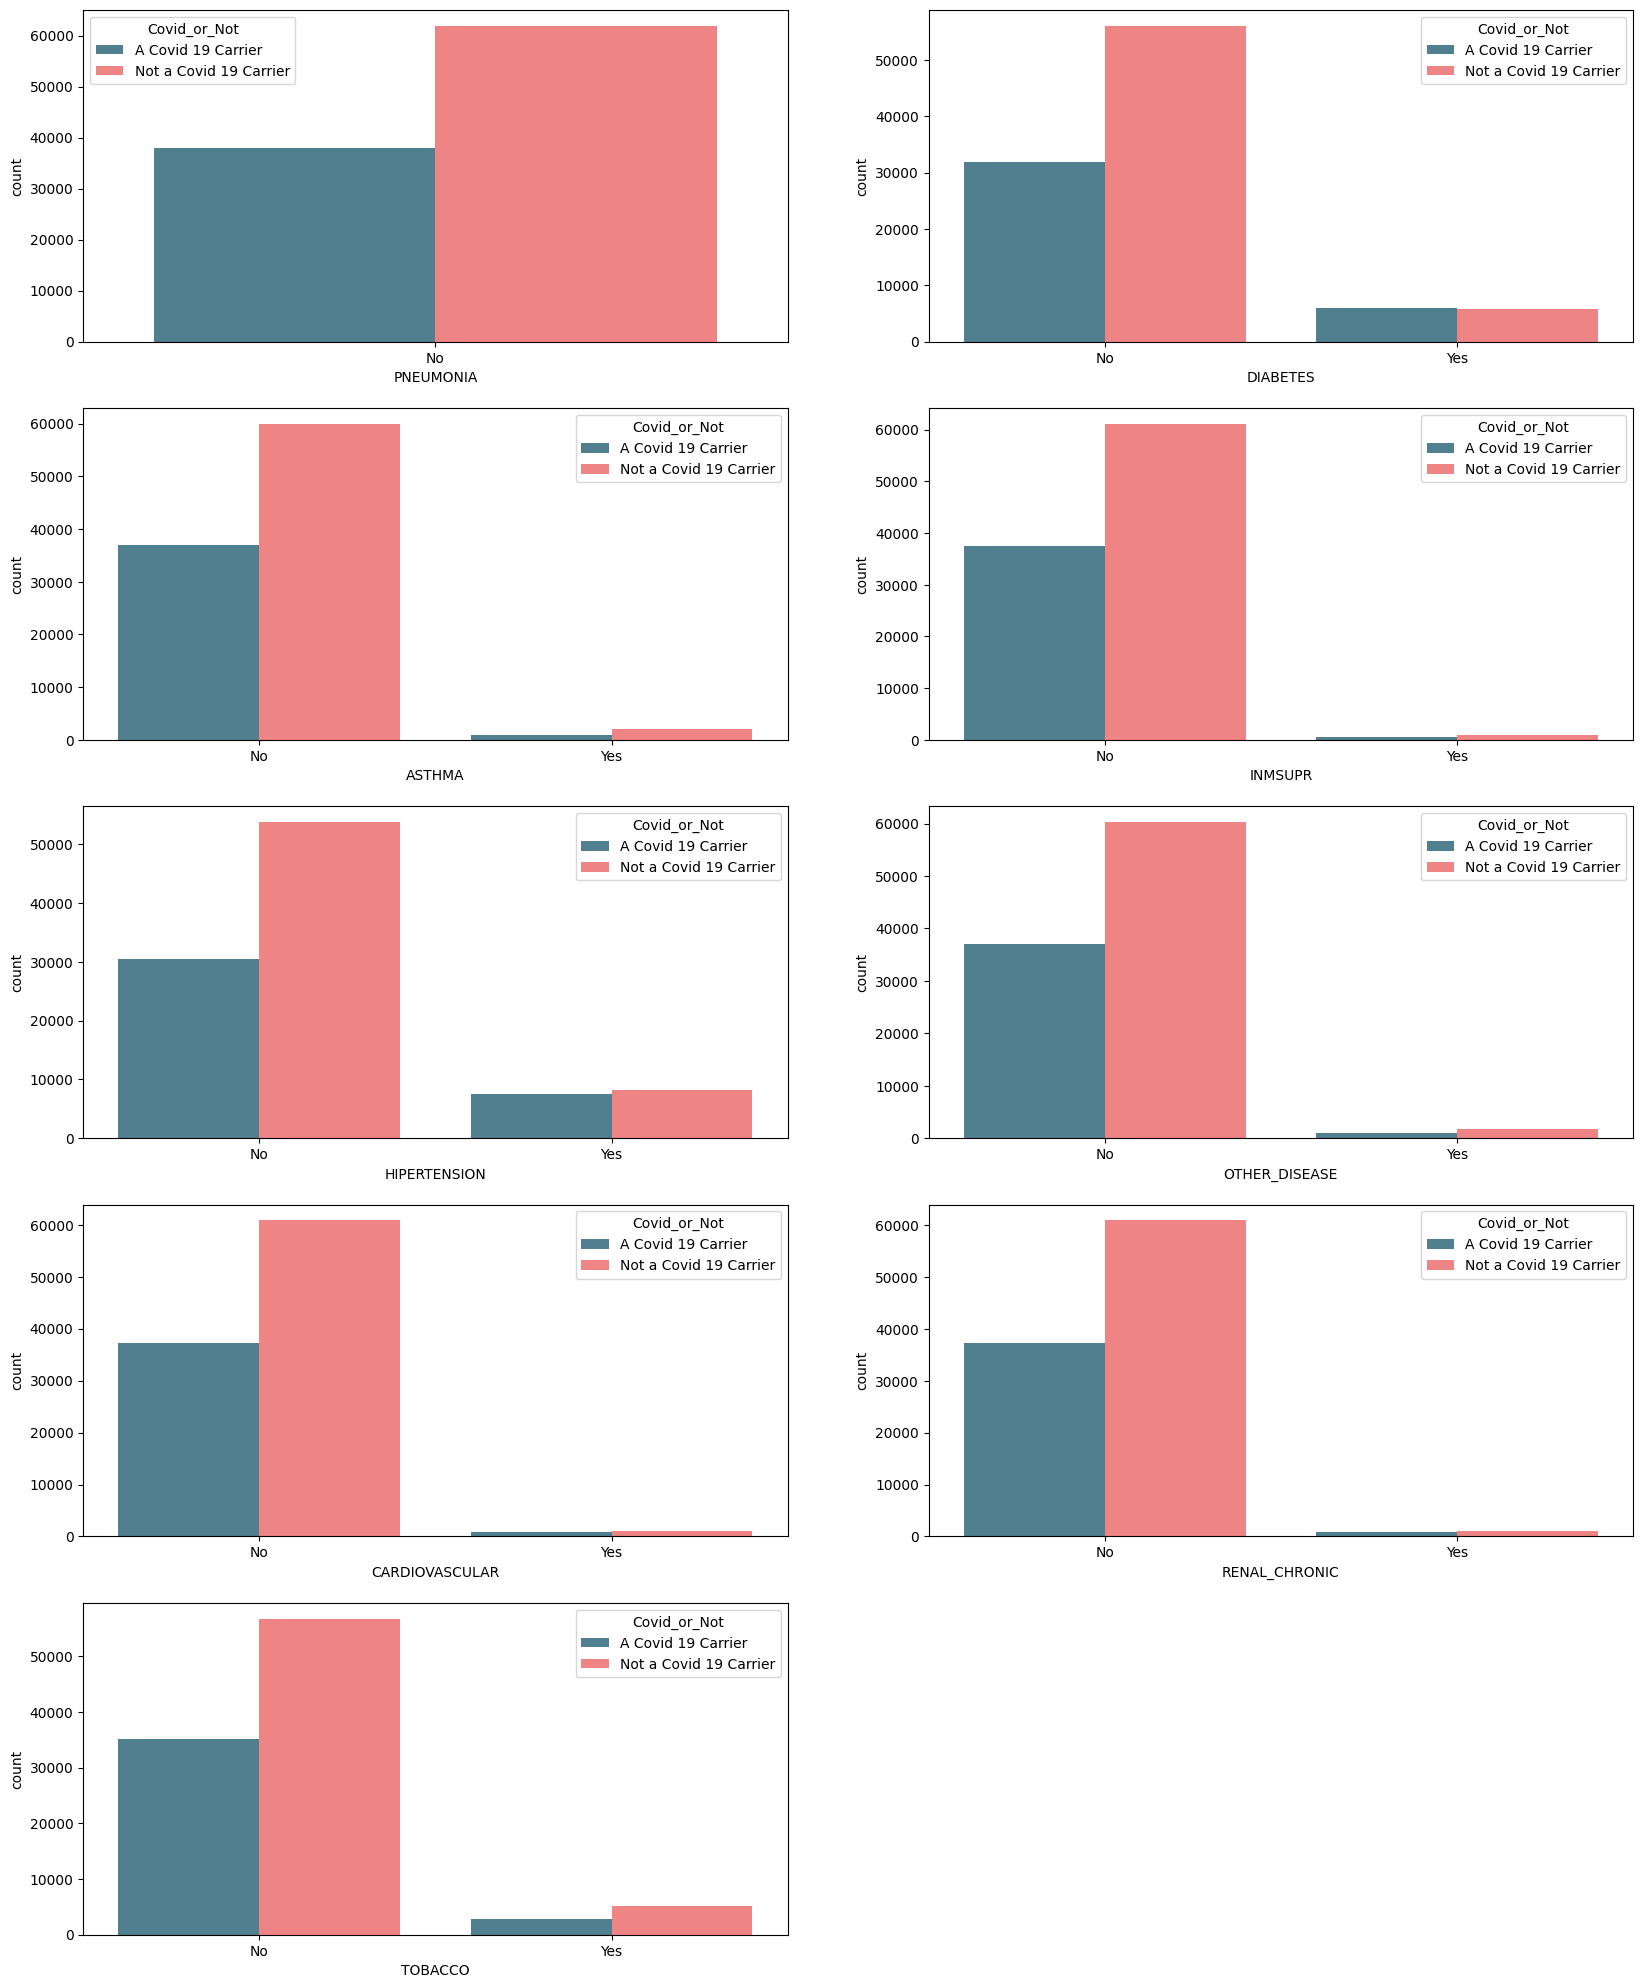

In [191]:
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases.columns:
    plt.subplot(5, 2, index)
    df_diseases[i] = ["Yes" if j==1 else "No" for j in df_diseases[i]]
    sns.countplot(data=df_diseases, x=i, hue=new_df["Covid_or_Not"], palette = ['#468499', '#ff7373'])
    index += 1
plt.show()

We noticed that the following diseases and habits have the highest impact:
1- Pneumonia
2- Hypertension
3- Diabetes
4- Tobacco usage

How many patients were hospitalized?

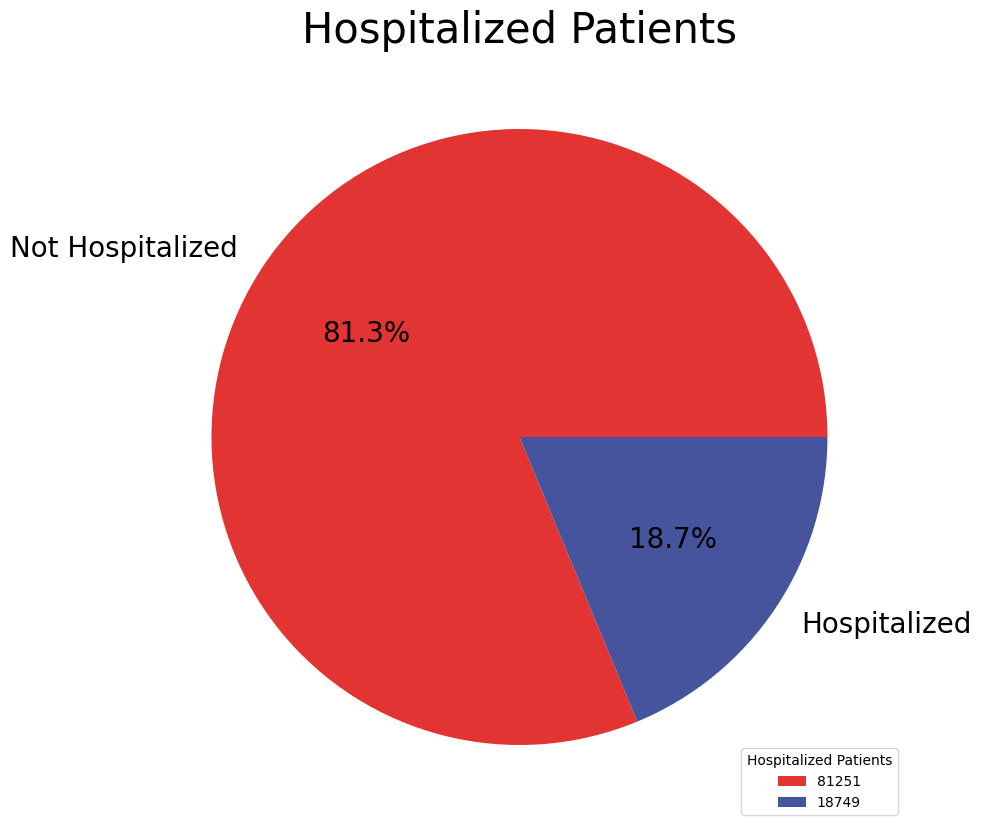

In [196]:
labels = ["Not Hospitalized", "Hospitalized"]
sizes = new_df['PATIENT_TYPE'].value_counts()
colors = ['#e13433', '#46549d']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.title('Hospitalized Patients',color = 'black',fontsize = 30)
plt.legend(new_df['PATIENT_TYPE'].value_counts(), loc = 'lower right', title = 'Hospitalized Patients')
plt.show()

How many of them (hospitalized people) have died?

In [203]:
df_hosp = new_df[new_df['PATIENT_TYPE']==2]

In [204]:
df_hosp['DEAD'] = df_hosp['DEAD'].replace(1, "Dead")
df_hosp['DEAD'] = df_hosp['DEAD'].replace(0, "Alive")

C:\Users\PMLS\AppData\Local\Temp\ipykernel_19832\2481955010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hosp['DEAD'] = df_hosp['DEAD'].replace(1, "Dead")
C:\Users\PMLS\AppData\Local\Temp\ipykernel_19832\2481955010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hosp['DEAD'] = df_hosp['DEAD'].replace(0, "Alive")


In [205]:
df_hosp['DEAD'].value_counts()

DEAD
Alive    12086
Dead      6663
Name: count, dtype: int64

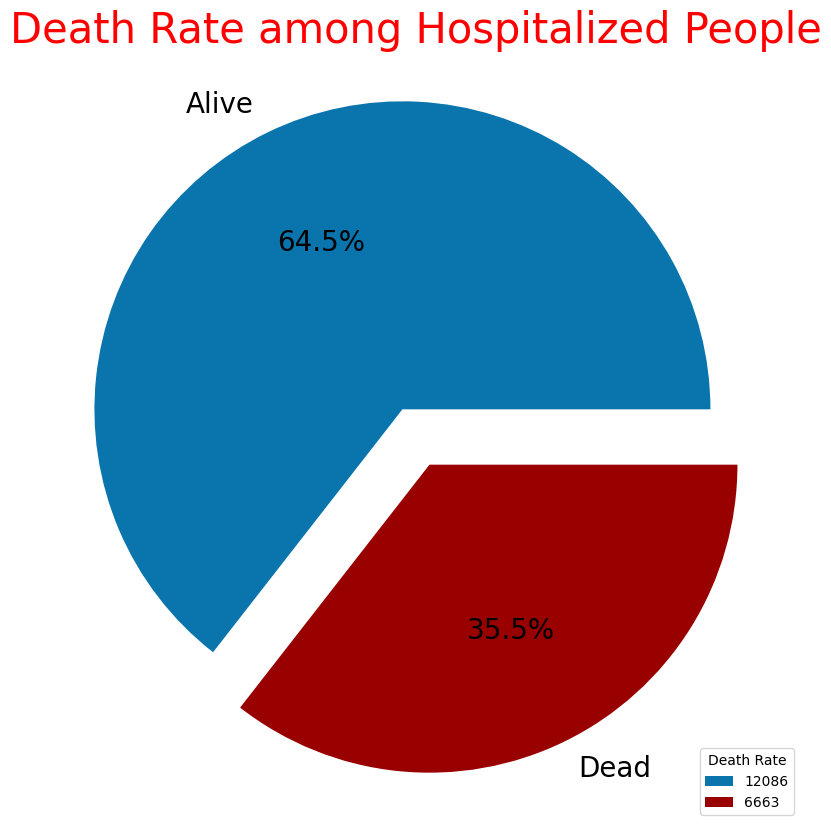

In [206]:
labels = ["Alive", "Dead"]
sizes = df_hosp['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.1, 0.1])
plt.title('Death Rate among Hospitalized People', color = 'red', fontsize = 30)
plt.legend(df_hosp['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()


Now Lets see check those 35% for their diseases and compare them to the rest (65%) to see if there were any indications that led to their unfortunate death

In [209]:
df_diseases2 = df_hosp.drop(columns = ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED',
                                      'AGE', "OBESITY",'CLASIFFICATION_FINAL', 'ICU', 'DEAD',
                                       'Covid_or_Not'])

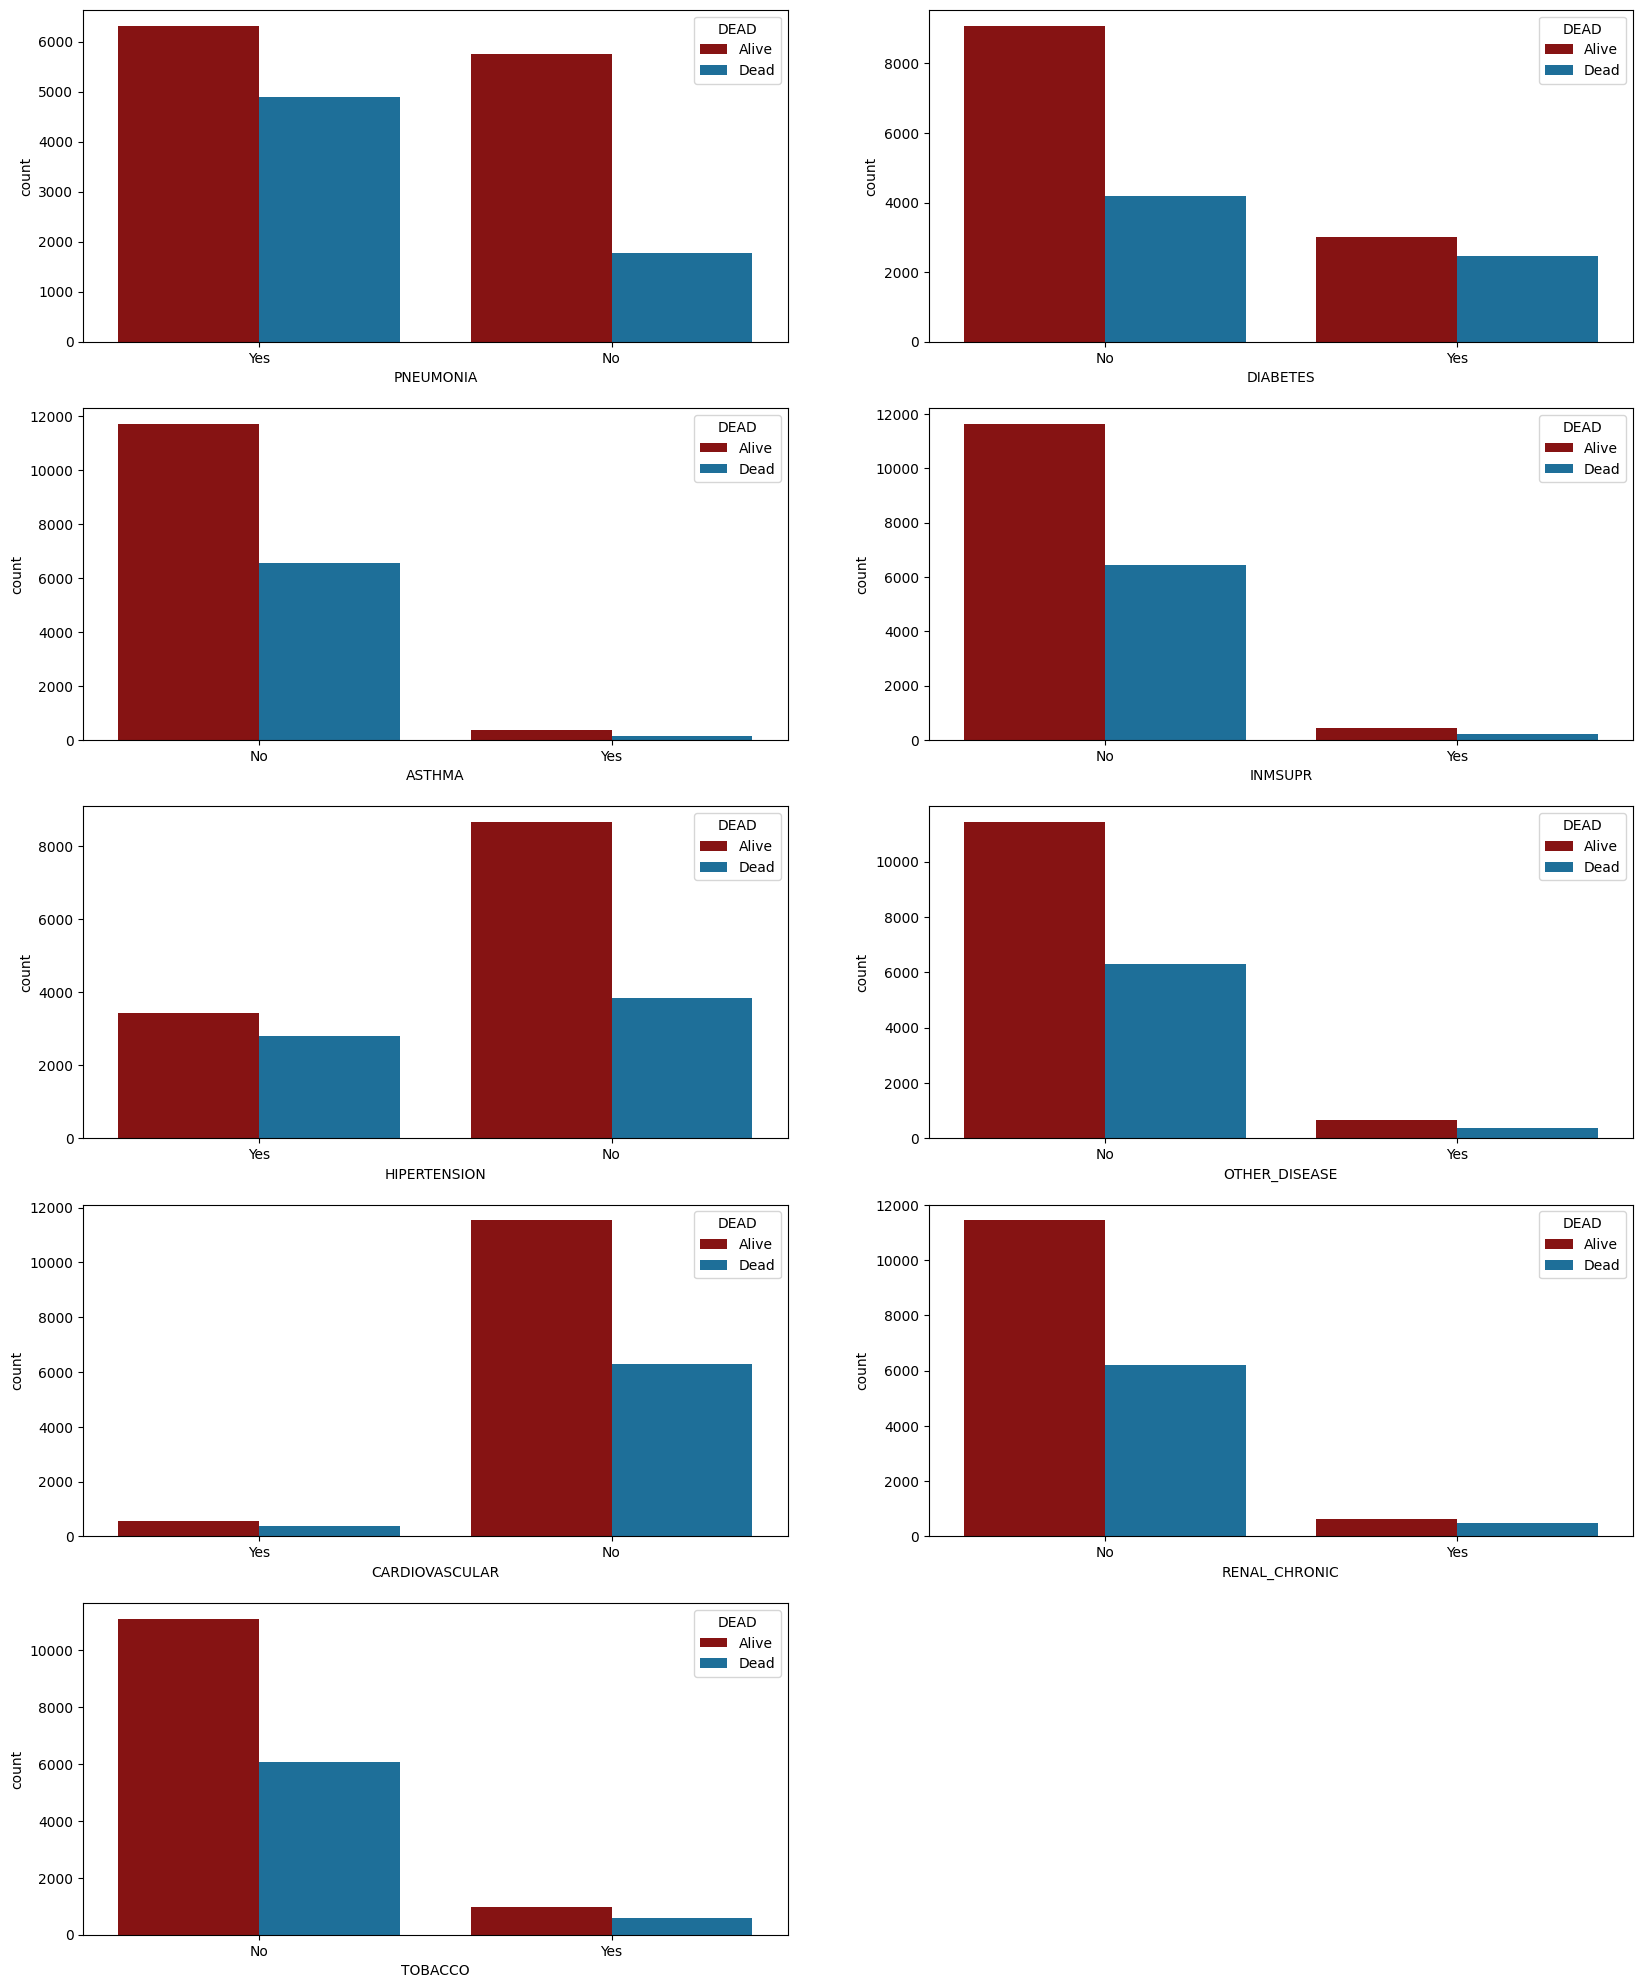

In [210]:
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases2.columns:
    plt.subplot(5, 2, index)
    df_diseases2[i] = ["Yes" if j==1 else "No" for j in df_diseases2[i]]
    sns.countplot(data=df_diseases2, x=i, hue=df_hosp['DEAD'],
                  palette = [ '#990000', '#0a75ad'])
    index += 1
plt.show()

We can see that most of those 35% didn't have any of those diseases except for those who had the following diseases:
1- Pneumonia
2- Hypertension
3- Diabetes

How many of those hospitalized patients had been admitted to the ICU?

In [212]:
new_df[(new_df['PATIENT_TYPE'] == 2) & (new_df['ICU'] == 1)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_or_Not
446768,1,12,2,2,2,1.0,52.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2,1,1,A Covid 19 Carrier
424048,2,9,2,2,1,2.0,17.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,1,0,Not a Covid 19 Carrier
29564,2,4,1,2,1,2.0,39.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,1,1,A Covid 19 Carrier
432024,2,10,2,2,2,1.0,55.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,1,1,A Covid 19 Carrier
400788,2,9,1,2,1,2.0,58.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,1,0,A Covid 19 Carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31251,2,4,2,2,1,2.0,57.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,1,1,A Covid 19 Carrier
393375,2,9,2,2,1,1.0,53.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6,1,1,Not a Covid 19 Carrier
61198,2,4,1,2,2,2.0,49.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3,1,0,A Covid 19 Carrier
57530,2,4,1,2,1,1.0,57.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,1,1,Not a Covid 19 Carrier


In [213]:
new_df[(new_df['PATIENT_TYPE'] == 2)]['ICU'].value_counts()

ICU
2    16857
1     1892
Name: count, dtype: int64

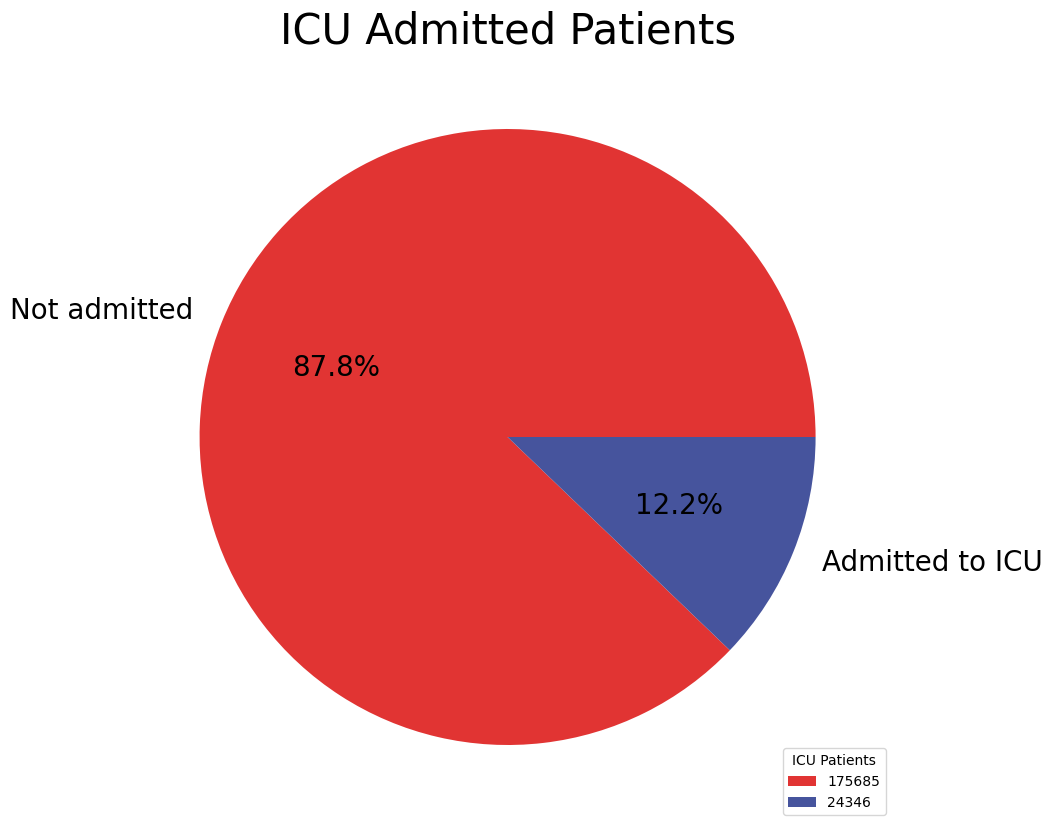

In [214]:
labels = ["Not admitted", "Admitted to ICU"]
sizes = df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts()
colors = [ '#e13433', '#46549d']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.title('ICU Admitted Patients',color = 'black',fontsize = 30)
plt.legend(df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts(), loc = 'lower right',
           title = 'ICU Patients')
plt.show()


## Feature Selection

In [226]:
df = new_df

In [227]:
df_model = df.drop(columns=['SEX'])

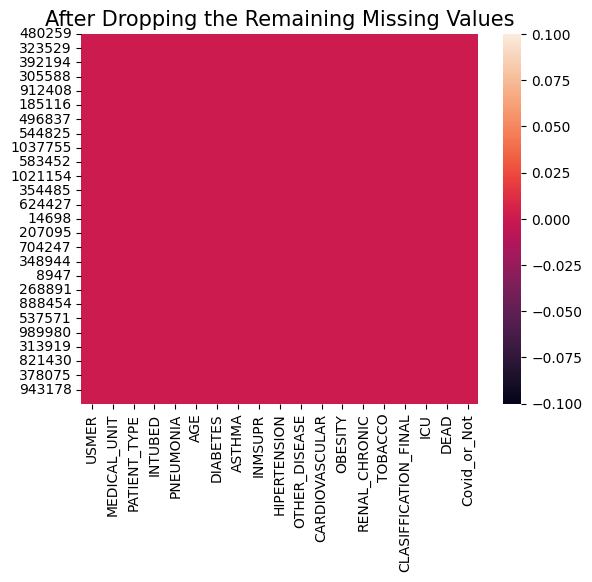

In [228]:
sns.heatmap(df_model.isnull())
plt.title('After Dropping the Remaining Missing Values', color = 'black', fontsize = 15)
plt.show()

In [229]:
df_model.Covid_or_Not.value_counts()

Covid_or_Not
Not a Covid 19 Carrier    61995
A Covid 19 Carrier        38005
Name: count, dtype: int64

In [230]:
df_model.Covid_or_Not = df_model.Covid_or_Not.apply(lambda x: 2 if x=="Not a Covid 19 Carrier" else 1)

In [231]:
df_model.Covid_or_Not.value_counts()

Covid_or_Not
2    61995
1    38005
Name: count, dtype: int64

Removing unnecessary features

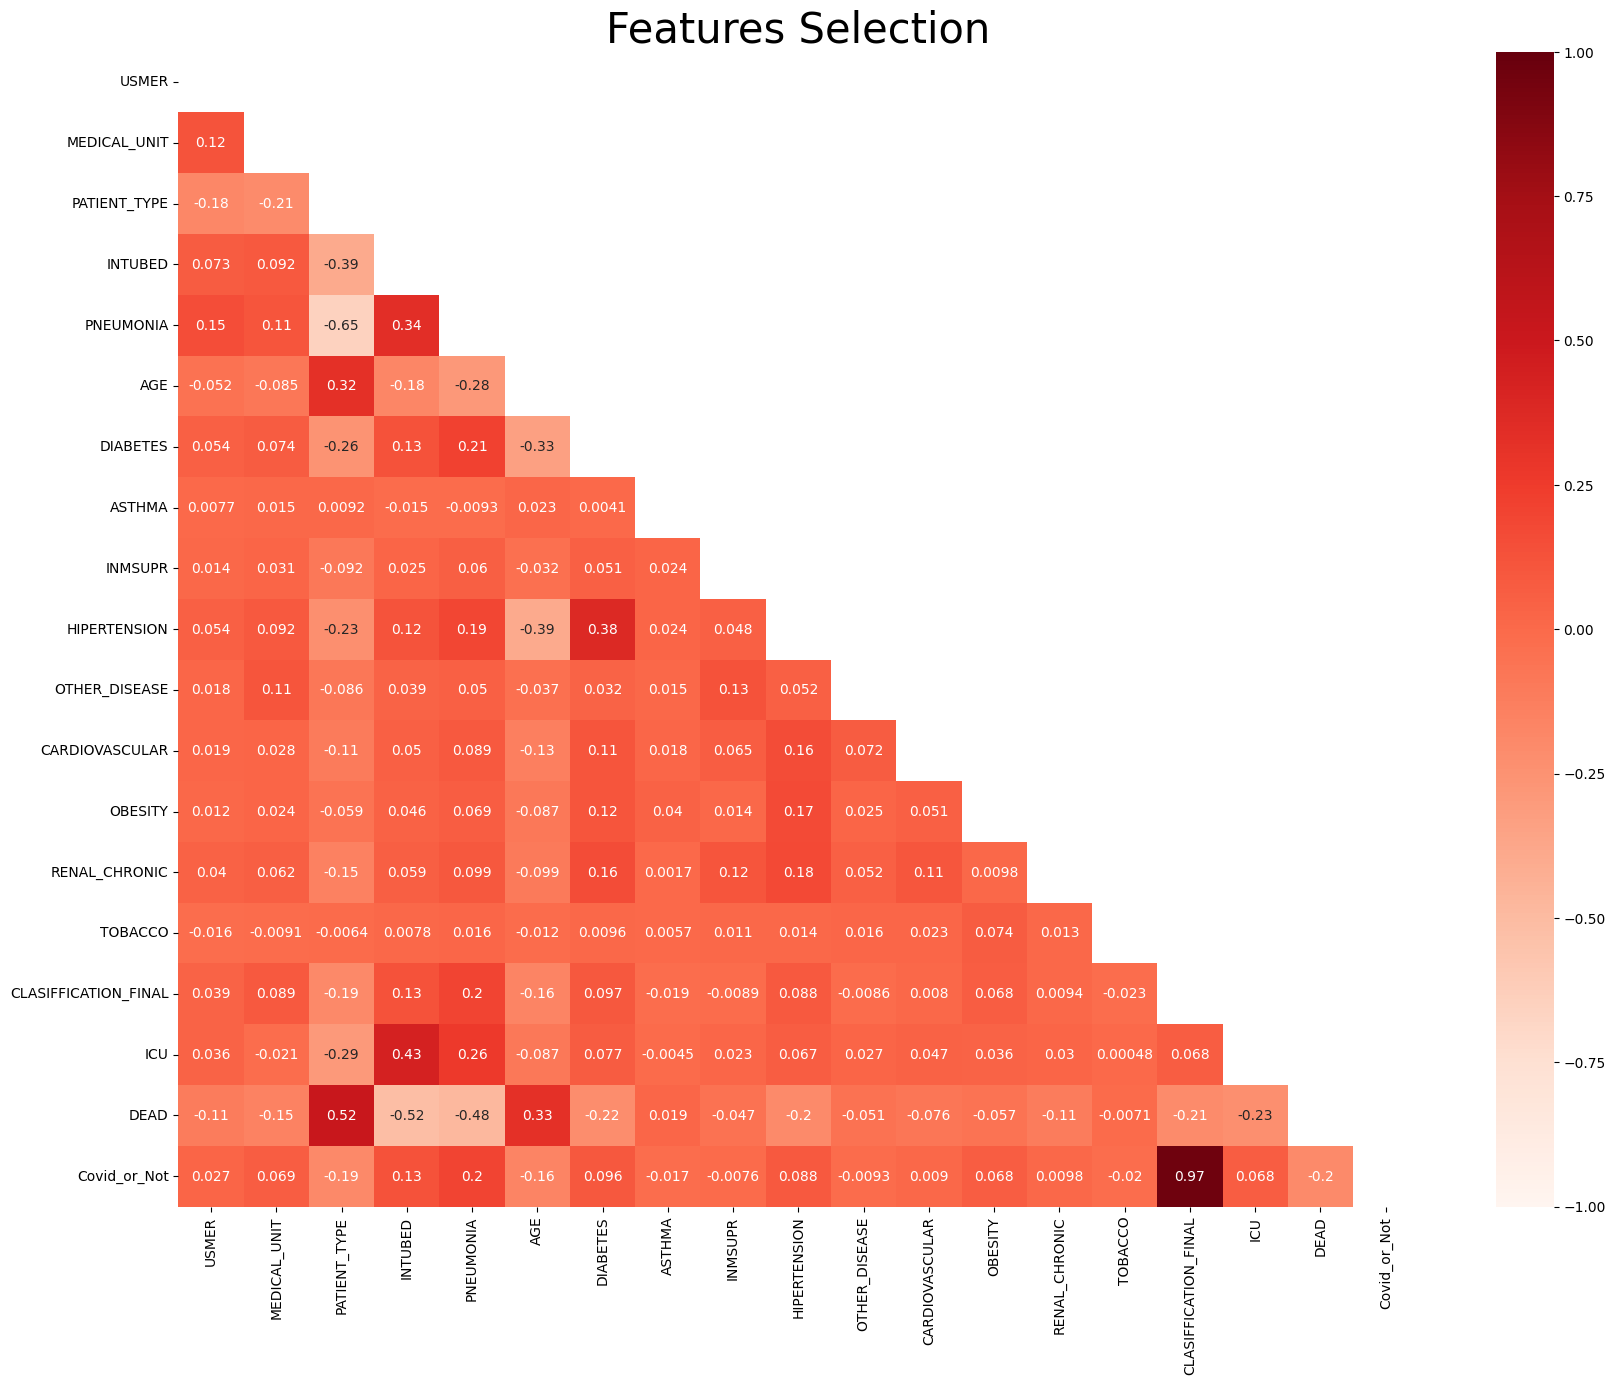

In [233]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(df_model.corr()))
sns.heatmap(df_model.corr(), annot = True, cmap = "Reds", vmin = -1, vmax = 1, mask = mask)
plt.title('Features Selection', color = 'black', fontsize = 30)
plt.show()

In [236]:
unrelevant_features = ["ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]
df_model.drop(columns=unrelevant_features,inplace=True)

In [237]:
X = df_model.drop('DEAD' , axis= 1)
Y = df_model['DEAD']

In [240]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

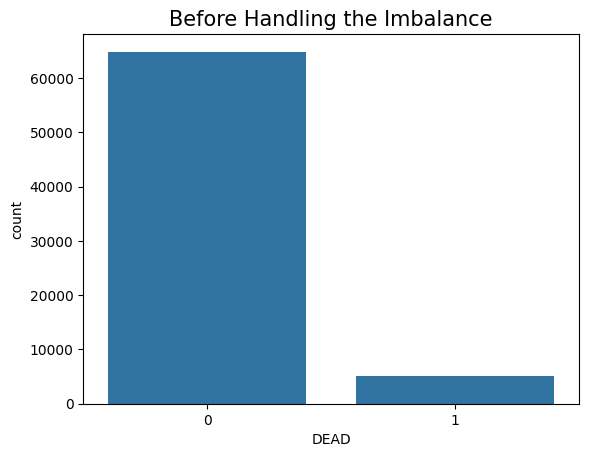

In [241]:
sns.countplot(x = y_train)
plt.title('Before Handling the Imbalance', color = 'black', fontsize = 15)
plt.show()

In [244]:
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

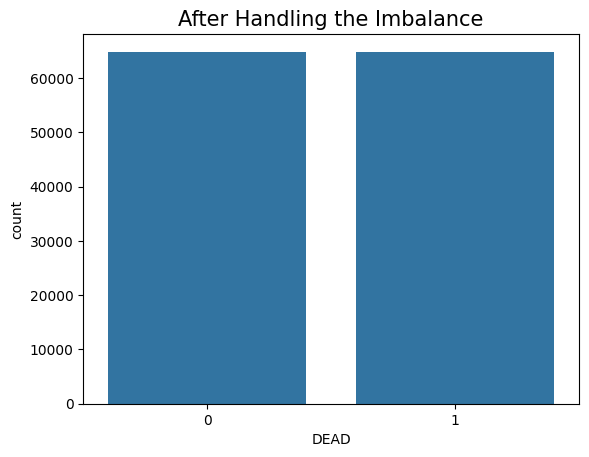

In [245]:
sns.countplot(x = y_train)
plt.title('After Handling the Imbalance', color = 'black', fontsize = 15)
plt.show()

#  Training and Testing

## Logistic Regression

In [247]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Logistic Regression Train Accuracy: ", lr.score(x_train,y_train), "\n")
print("Logistic Regression Test Accuracy: ", lr.score(x_test,y_test))

Logistic Regression Train Accuracy:  0.9116308489794659 

Logistic Regression Test Accuracy:  0.9038333333333334


c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [249]:
Classes = ['Not Dead', 'Dead']
print("Logistic Regression Classification Report:", "\n", 
      classification_report(y_test, lr.predict(x_test), target_names = Classes))

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.99      0.90      0.95     27855
        Dead       0.42      0.91      0.57      2145

    accuracy                           0.90     30000
   macro avg       0.71      0.90      0.76     30000
weighted avg       0.95      0.90      0.92     30000



## Decision Tree

In [250]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
print("Decision Tree Train Accuracy: ", dt.score(x_train,y_train), "\n")
print("Decision Tree Test Accuracy: ", dt.score(x_test,y_test))

Decision Tree Train Accuracy:  0.9829293879880899 

Decision Tree Test Accuracy:  0.9326333333333333


In [251]:
print("Decision Tree Classification Report:", "\n",
      classification_report(y_test, dt.predict(x_test), target_names = Classes))

Decision Tree Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.97      0.96      0.96     27855
        Dead       0.52      0.61      0.57      2145

    accuracy                           0.93     30000
   macro avg       0.75      0.79      0.76     30000
weighted avg       0.94      0.93      0.94     30000



## Random Forest

In [252]:
rf=RandomForestClassifier(n_estimators=4,random_state=42)
rf.fit(x_train,y_train)
print("Random Forest Train Accuracy: ", rf.score(x_train,y_train), "\n")
print("Random Forest Forest Test Accuracy: ", rf.score(x_test,y_test))

Random Forest Train Accuracy:  0.9799055832394823 

Random Forest Forest Test Accuracy:  0.9344333333333333


In [253]:
print("Random Forest Classification Report:", "\n",classification_report(y_test, rf.predict(x_test), target_names = Classes))

Random Forest Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.97      0.96      0.96     27855
        Dead       0.54      0.63      0.58      2145

    accuracy                           0.93     30000
   macro avg       0.75      0.79      0.77     30000
weighted avg       0.94      0.93      0.94     30000



## Naive Bayes

In [254]:
gnb = GaussianNB()
gnb.fit(x_train , y_train)
print("Naive Bayes Train Accuracy: ", gnb.score(x_train,y_train), "\n")
print("Naive Bayes Test Accuracy: ", gnb.score(x_test,y_test))

Naive Bayes Train Accuracy:  0.8876178281059566 

Naive Bayes Test Accuracy:  0.9049


In [255]:
print("Naive Bayes Classification Report:", "\n",
      classification_report(y_test, gnb.predict(x_test), target_names = Classes))

Naive Bayes Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.99      0.91      0.95     27855
        Dead       0.42      0.86      0.56      2145

    accuracy                           0.90     30000
   macro avg       0.70      0.88      0.75     30000
weighted avg       0.95      0.90      0.92     30000

